# QuantEcon: Python Programming for Economics and Finance 

Exercises from https://python-programming.quantecon.org/intro.html

## 3.6 Exercises 

In [34]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

### Exercise 1
Simulate and plot the correlated time series 

$$ x_{t+1} = \alpha x_t + \varepsilon_{t+1} $$

where $x_0 = 0$, $t = 0, ..., T$, and the sequence of shocks $\{\varepsilon_t\}$ is assumed to be i.i.d. standard normal.

Let $T = 200$ and $\alpha = 0.9$.

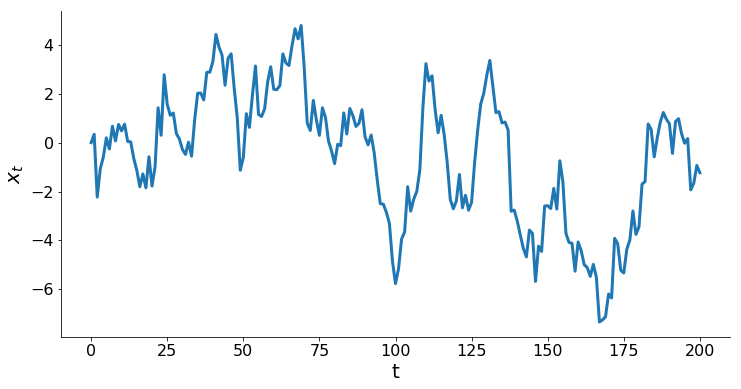

In [45]:
T = 200
α = 0.9 

ɛ_values = np.random.randn(T+1)

x_values = np.empty(T+1)
x_values[0] = 0

for i in range(T):
    x_values[i+1] = α * x_values[i] + ɛ_values[i+1]

plt.plot(x_values)
plt.xlabel('t')
plt.ylabel('$x_t$')
plt.show()

### Exercise 2
Starting with your solution to exercise 1, plot three simulated time series, one for each of the cases α=0, α=0.8 and α=0.98.

Use a for loop to step through the α values.

If you can, add a legend, to help distinguish between the three time series.

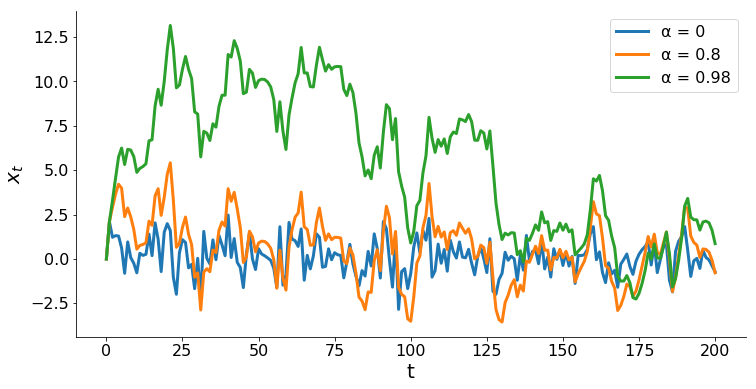

In [46]:
T = 200
α_values = [0, 0.8, 0.98]

ɛ_values = np.random.randn(T+1)

x_values = np.empty((T+1, len(α_values)))
x_values[0] = 0

for j in range(len(α_values)):
    for i in range(T):
        x_values[i+1,j] = α_values[j] * x_values[i,j] + ɛ_values[i+1]

# Could have included plots into for loop
plt.plot(x_values[:,0], label = 'α = ' + str(α_values[0]))
plt.plot(x_values[:,1], label = 'α = ' + str(α_values[1]))
plt.plot(x_values[:,2], label = 'α = ' + str(α_values[2]))

plt.legend()
plt.xlabel('t')
plt.ylabel('$x_t$')

plt.show()

### Exercise 3
Similar to the previous exercises, plot the time series

$$ x_{t+1} = α|x_t|+ \varepsilon_{t+1}$$

where $x_0=0$ and $t=0,...,T$. Use T=200, α=0.9 and {$\varepsilon_t$} as before.

Search online for a function that can be used to compute the absolute value $|x_t|$.

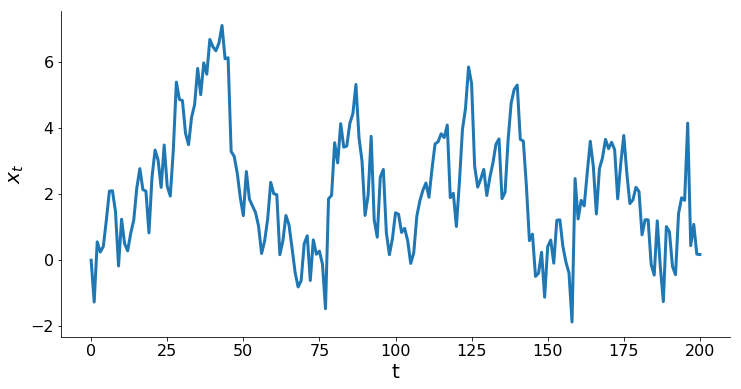

In [47]:
T = 200
α = 0.9 

ɛ_values = np.random.randn(T+1)

x_values = np.empty(T+1)
x_values[0] = 0

for i in range(T):
    x_values[i+1] = α * np.abs(x_values[i]) + ɛ_values[i+1]

plt.plot(x_values)
plt.xlabel('t')
plt.ylabel('$x_t$')
plt.show()

### Exercise 4
One important aspect of essentially all programming languages is branching and conditions.

In Python, conditions are usually implemented with if–else syntax.

Now, write a new solution to Exercise 3 that does not use an existing function to compute the absolute value.

Replace this existing function with an if–else condition

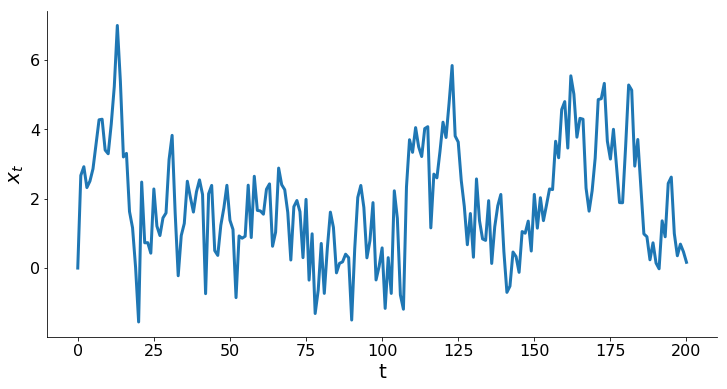

In [48]:
T = 200
α = 0.9 

ɛ_values = np.random.randn(T+1)

x_values = np.empty(T+1)
x_values[0] = 0

for i in range(T):
    if x_values[i] > 0:
        x_values[i+1] = α * x_values[i] + ɛ_values[i+1]
    else: 
        x_values[i+1] = - α * x_values[i] + ɛ_values[i+1]

plt.plot(x_values)
plt.xlabel('t')
plt.ylabel('$x_t$')
plt.show()

### Exercise 5
Here’s a harder exercise, that takes some thought and planning.

The task is to compute an approximation to π using Monte Carlo.

Use no imports besides NumPy.

Your hints are as follows:

- If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$.

- If $U_1,...,U_n$ are i.i.d. copies of $U$, then, as $n$ gets large, the fraction that falls in $B$, converges to the probability of landing in $B$.

- For a circle, area=π∗radius$^2$.

In [63]:
# Monte-Carlo Simulations with one value of iterations
n = 10000
num_in = 0
  
for i in range(n):
    u_x = np.random.uniform(0,1)  
    u_y = np.random.uniform(0,1)
    dist = np.sqrt(u_x**2 + u_y**2)
    if dist < 1: 
        num_in += 1
    else:
        continue
    
π_approx = (num_in / n) * 4

print(π_approx)

3.14


In [70]:
# Monte-Carlo Simulations with multiple values of iterations
n = [1000, 5000, 10000, 50000]
num_in = np.zeros(len(n))
π_approx = np.empty(len(n))

for j in range(len(n)):    
    for i in range(n[j]):
        u_x = np.random.uniform(0,1)  
        u_y = np.random.uniform(0,1)
        dist = np.sqrt(u_x**2 + u_y**2)
        if dist < 1: 
            num_in[j] = num_in[j] + 1
        else:
            continue
    
    π_approx[j] = (num_in[j] / n[j]) * 4
    print('When n = ' + str(n[j]) + ', the approximation of π is ' + str(π_approx[j]))

When n = 1000, the approximation of π is 3.088
When n = 5000, the approximation of π is 3.164
When n = 10000, the approximation of π is 3.1576
When n = 50000, the approximation of π is 3.144
